## Session 3 - Train a REGRESSION Model

We want to develop a house price prediction model using a Linear Regression model.

The client is really interested in understanding how it works as he has to explain to his clients but also because they are interested to understand the problem for future royal state investments.

We ask you to develop the best linear model which only uses 12 features.

Requirements:
1) Apply OLS and Regularized models.

2) Apply Forward or Backward Feature selection.

3) Justify the chosen model with an evaluation comparison.

4) Explain which are the most important features.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mlub2021-session3/test_set.csv
/kaggle/input/mlub2021-session3/sampleSubmission.csv
/kaggle/input/mlub2021-session3/train_set.csv


In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required

import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

# Settings for the visualizations
import seaborn as sns
print(sns.__version__)
assert sns.__version__ >= "0.10"
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

import pandas as pd
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 50)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

0.11.2


## SETUP


First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

# Settings for the visualizations
import seaborn as sns
print(sns.__version__)
assert sns.__version__ >= "0.10"
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

import pandas as pd
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 50)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

0.11.2


## DATA ANALYSIS

First we will load our data sets, explore our data and see if we can extract valuable information to later construct our model. This process is the same we followed on Project 2.

In [4]:
train_set = pd.read_csv('/kaggle/input/mlub2021-session3/train_set.csv',index_col=0) 
test_set = pd.read_csv('/kaggle/input/mlub2021-session3/test_set.csv',index_col=0)

In [5]:
# to make this notebook's output identical at every run
np.random.seed(120)
random_seed = 120

In [6]:
# print the dataset size
print("There is", train_set.shape[0], "samples in the train set")
print("Each sample has", train_set.shape[1], "features in the train set")

There is 5432 samples in the train set
Each sample has 21 features in the train set


In [7]:
#See all the rows and its data format 
train_set.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,NaN,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,NaN,NaN,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.0,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,NaN,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.0,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0


In [8]:
#All non-categorical features
train_set.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,5432.000000,5.432000e+03,5432.000000,5432.000000,5432.000000,5432.000000,5407.000000,5432.000000,2890.000000,3302.000000,5432.000000,5432.000000,5432.000000
mean,2.937224,1.078470e+06,10.220692,3106.552835,2.917342,1.538660,1.630109,537.054676,163.462430,1965.219564,-37.809664,144.995491,7438.537555
std,0.951947,6.470654e+05,5.996967,95.185290,0.988414,0.704286,0.982855,1550.867601,843.189116,36.244398,0.079365,0.106382,4368.906756
min,1.000000,1.450000e+05,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1830.000000,-38.174880,144.542370,389.000000
25%,2.000000,6.500000e+05,6.200000,3046.000000,2.000000,1.000000,1.000000,182.750000,92.000000,1940.000000,-37.856648,144.930800,4294.000000
50%,3.000000,9.015000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,450.000000,125.000000,1970.000000,-37.802635,145.000250,6543.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,654.250000,174.750000,1999.000000,-37.757238,145.059225,10331.000000
max,8.000000,8.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,75100.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [9]:
# we can see the type of each features as follows
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5432 entries, 0 to 5431
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         5432 non-null   object 
 1   Address        5432 non-null   object 
 2   Rooms          5432 non-null   int64  
 3   Type           5432 non-null   object 
 4   Price          5432 non-null   float64
 5   Method         5432 non-null   object 
 6   SellerG        5432 non-null   object 
 7   Date           5432 non-null   object 
 8   Distance       5432 non-null   float64
 9   Postcode       5432 non-null   float64
 10  Bedroom2       5432 non-null   float64
 11  Bathroom       5432 non-null   float64
 12  Car            5407 non-null   float64
 13  Landsize       5432 non-null   float64
 14  BuildingArea   2890 non-null   float64
 15  YearBuilt      3302 non-null   float64
 16  CouncilArea    4879 non-null   object 
 17  Lattitude      5432 non-null   float64
 18  Longtitu

In [10]:
## POSTCODE IS NOT NUMERIC, we should change it to categorica
train_set['Postcode'] = pd.Categorical(train_set.Postcode)
train_set.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,5432.000000,5.432000e+03,5432.000000,5432.000000,5432.000000,5407.000000,5432.000000,2890.000000,3302.000000,5432.000000,5432.000000,5432.000000
mean,2.937224,1.078470e+06,10.220692,2.917342,1.538660,1.630109,537.054676,163.462430,1965.219564,-37.809664,144.995491,7438.537555
std,0.951947,6.470654e+05,5.996967,0.988414,0.704286,0.982855,1550.867601,843.189116,36.244398,0.079365,0.106382,4368.906756
min,1.000000,1.450000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1830.000000,-38.174880,144.542370,389.000000
25%,2.000000,6.500000e+05,6.200000,2.000000,1.000000,1.000000,182.750000,92.000000,1940.000000,-37.856648,144.930800,4294.000000
50%,3.000000,9.015000e+05,9.200000,3.000000,1.000000,2.000000,450.000000,125.000000,1970.000000,-37.802635,145.000250,6543.000000
75%,3.000000,1.330000e+06,13.000000,3.000000,2.000000,2.000000,654.250000,174.750000,1999.000000,-37.757238,145.059225,10331.000000
max,8.000000,8.000000e+06,48.100000,20.000000,8.000000,10.000000,75100.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


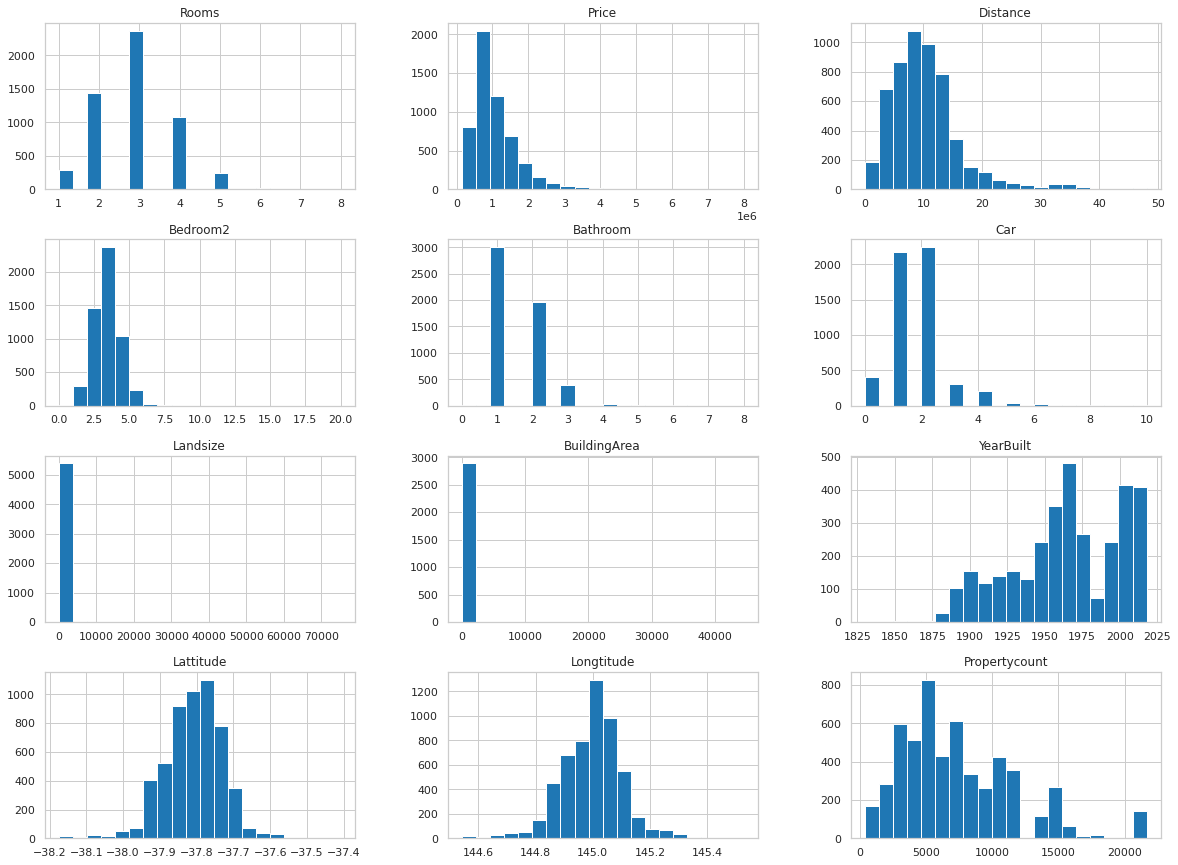

In [11]:
#Observe data and its distribution 
train_set.hist(bins=20, figsize=(20,15))
plt.show()

[]

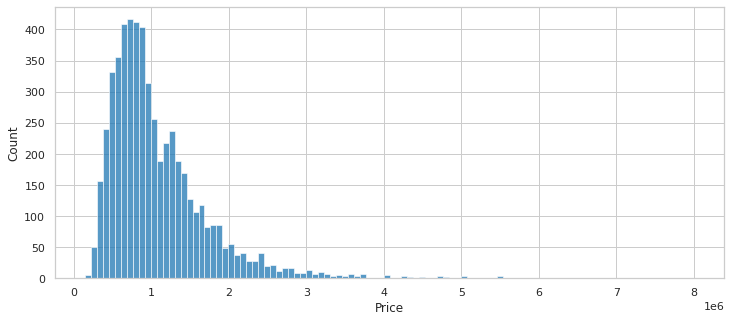

In [12]:
#Prices histogram
sns.histplot(train_set['Price'])
plt.plot()

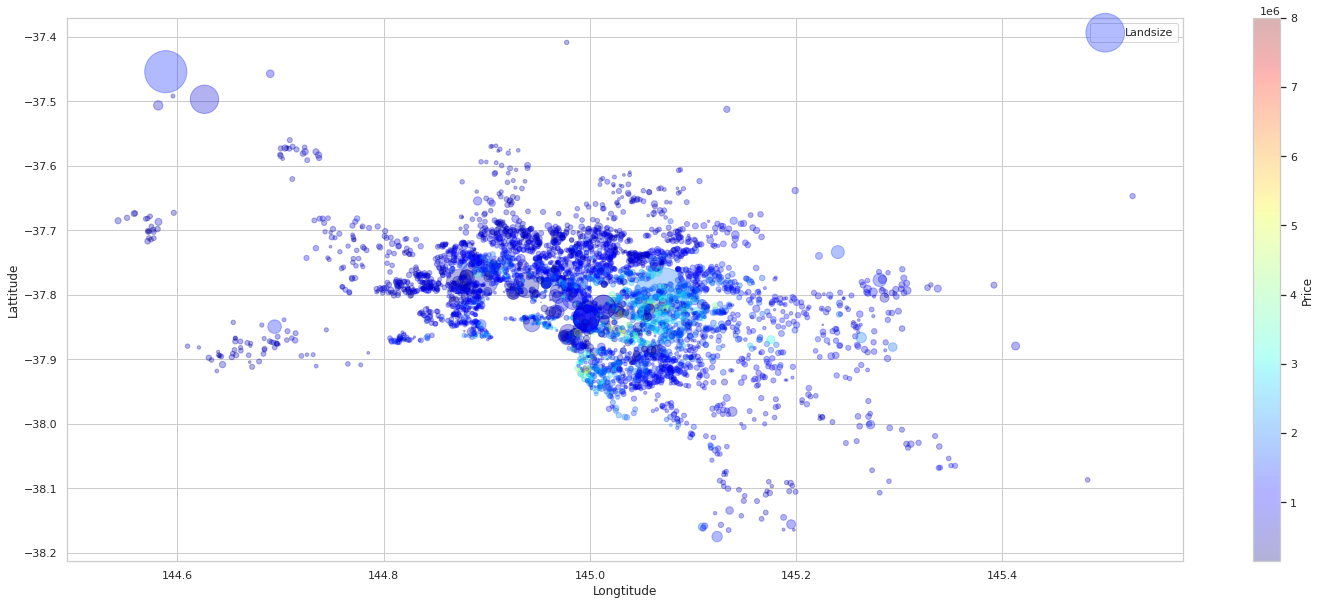

In [13]:
train_set.plot(kind="scatter", x="Longtitude", y="Lattitude", alpha=0.3,
             s=train_set["Landsize"]/25, label="Landsize", 
             figsize=(25,10),
             c="Price", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
plt.show()

#### Correlation study


In [14]:
corr_mat = train_set.corr()
corr_mat["Price"].sort_values(ascending=False)

Price            1.000000
Rooms            0.494941
Bedroom2         0.460544
Bathroom         0.459137
Car              0.227902
Longtitude       0.199303
BuildingArea     0.061963
Landsize         0.048182
Propertycount   -0.038241
Distance        -0.167654
Lattitude       -0.206769
YearBuilt       -0.352157
Name: Price, dtype: float64

Now, this correlation becomes more important, as we are using a regression model, we expect that data with high correlation with our prices gives us better scores

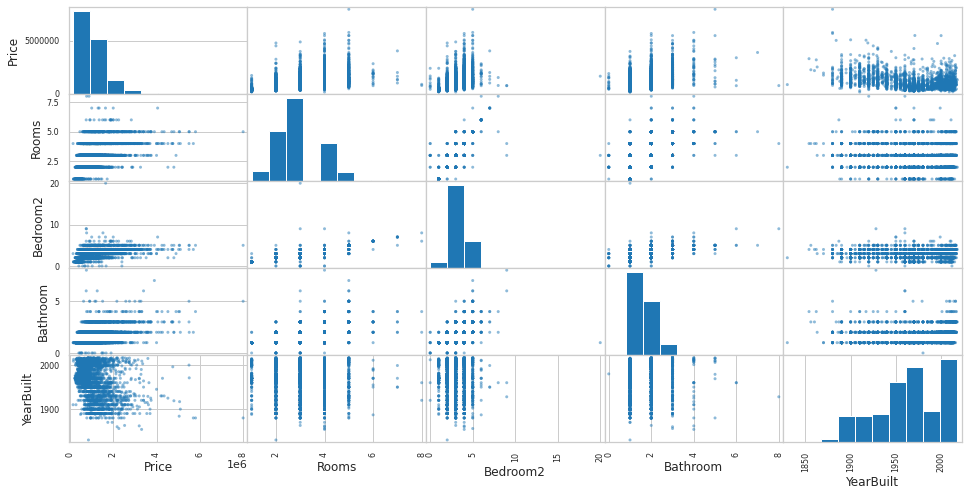

In [15]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["Price", "Rooms", "Bedroom2","Bathroom",
              "YearBuilt"]
scatter_matrix(train_set[attributes], figsize=(16, 8))
plt.show()

Some numerical features have clear linear correlation with the price, as the number of rooms, bedrooms... Others may have other kind of correlation (as seen with the Lattitude and Longitude features), or we cannot see it now because the data is not clean

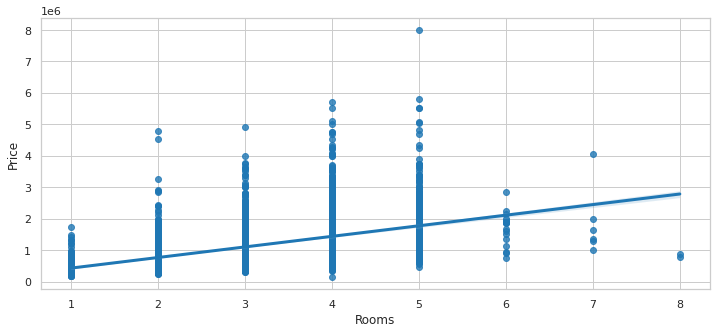

In [16]:
#Rooms vs Price
sns.regplot(data=train_set, x="Rooms", y="Price")
plt.show()

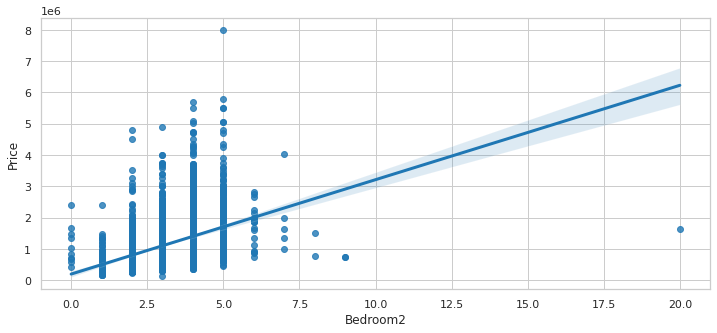

In [17]:
#Bedroom2 vs Price
sns.regplot(data=train_set, x="Bedroom2", y="Price")
plt.show()

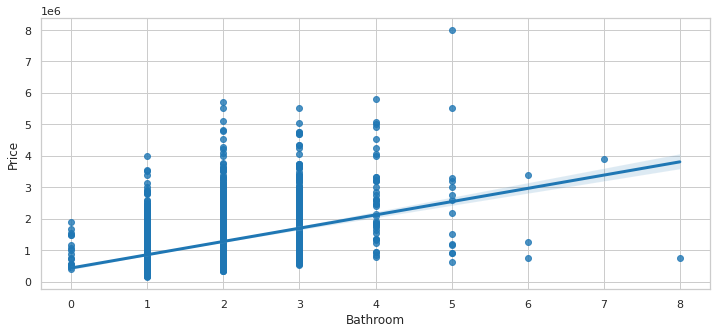

In [18]:
#BathRoom vs Price
sns.regplot(data=train_set, x="Bathroom", y="Price")
plt.show()

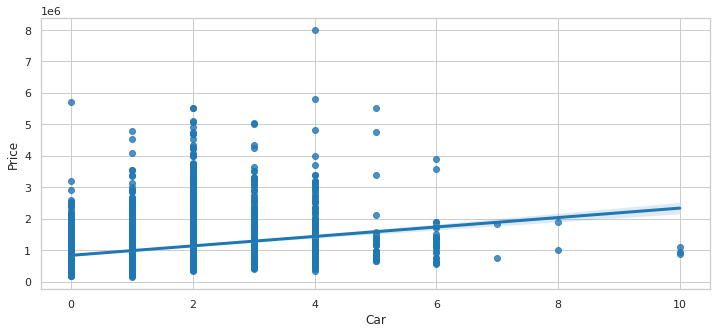

In [19]:
#Car vs Price
sns.regplot(data=train_set, x="Car", y="Price")
plt.show()

In [20]:
# Type value, even that it is indeed categorical, has influence on the price, as we see that 
# the mean price changes between categories
train_set[["Type", "Price"]].groupby("Type").describe()

Price                                                              \
       count          mean            std       min       25%        50%   
Type                                                                       
h     3765.0  1.244751e+06  679481.019261  145000.0  792000.0  1070000.0   
t      476.0  9.606894e+05  405810.931330  310000.0  680000.0   865000.0   
u     1191.0  5.998921e+05  250037.727958  160000.0  434500.0   560000.0   

                            
            75%        max  
Type                        
h     1500000.0  8000000.0  
t     1135500.0  3275000.0  
u      700000.0  2120000.0

In [21]:
#On the other hand, looks like Method does not influence the price in any way
train_set[["Method", "Price"]].groupby("Method").describe()

Price                                                             \
         count          mean            std       min       25%       50%   
Method                                                                      
PI       648.0  1.134799e+06  715764.216291  145000.0  650000.0  950000.0   
S       3597.0  1.080985e+06  610468.255458  216000.0  676000.0  918000.0   
SA        36.0  1.066667e+06  515437.373222  360000.0  659875.0  937500.0   
SP       668.0  9.225327e+05  508077.520178  245000.0  575000.0  800000.5   
VB       483.0  1.200704e+06  905612.926784  160000.0  570000.0  900000.0   

                              
              75%        max  
Method                        
PI      1450000.0  5800000.0  
S       1325000.0  5700000.0  
SA      1309375.0  2725000.0  
SP      1132375.0  3600000.0  
VB      1600000.0  8000000.0

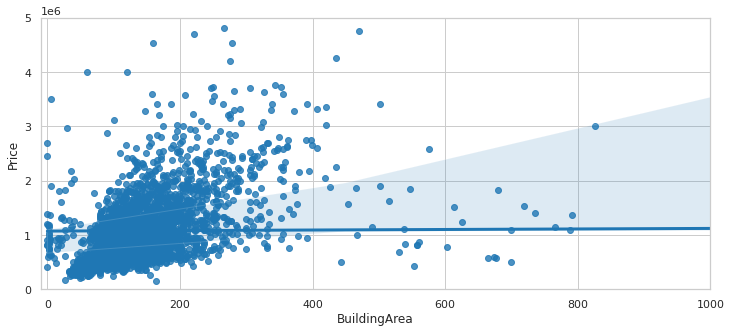

In [22]:
#BuildingArea vs Price
sns.regplot(data=train_set, x="BuildingArea", y="Price")
plt.axis([-10, 1000, 0, 5e6])
plt.show()

Building area seem to have a lot of faulty data,that makes this features seem to be not useful for our predictions. Maybe if we filter this data in some way we can make it useful in the future.

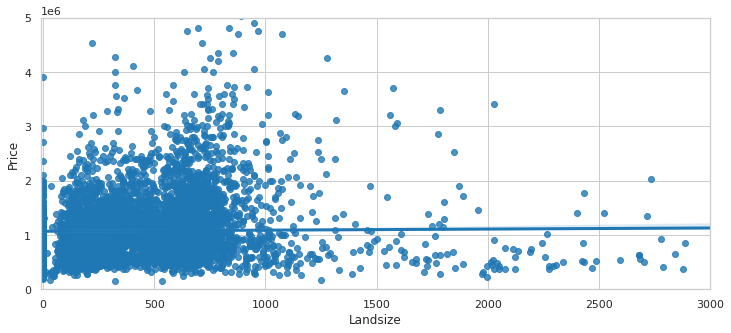

In [23]:
#LandSize vs Price
sns.regplot(data=train_set, x="Landsize", y="Price")
plt.axis([-10, 3000, 0, 5e6])
plt.show()

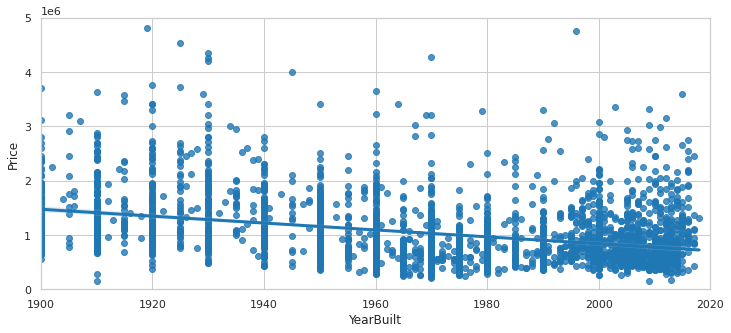

In [24]:
#Price vs YearBuilt
sns.regplot(data=train_set, x="YearBuilt", y="Price")
plt.axis([1900, 2020, 0, 5e6])
plt.show()

YearBuilt data seems really suspicious. Older houses have higher prices, which does not make a lot of sense, as we would expect newer houses to be more expensive. We also have a lot of nans and faulty data, so for now I think the best decision is to not use YearBuilt feature.

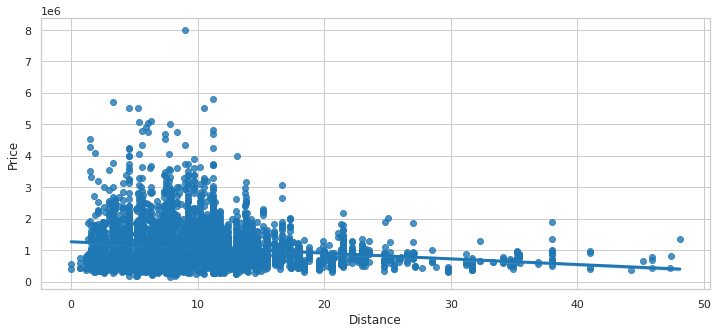

In [25]:
#Price vs Distance
sns.regplot(data=train_set, x="Distance", y="Price")
plt.show()

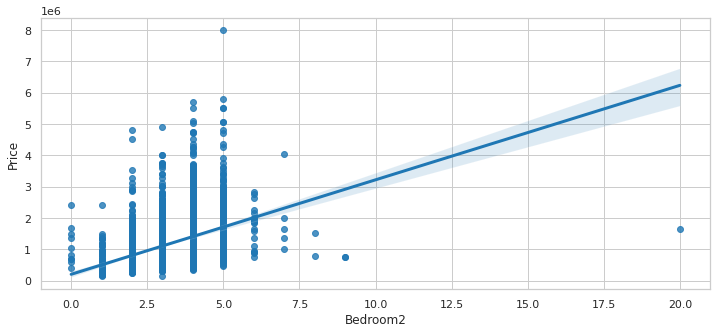

In [26]:
#Price vs Bedroom2
sns.regplot(data=train_set, x="Bedroom2", y="Price")
plt.show()

Bedroom2 is interesting. By its name it seems that it indicates the number of Bedrooms, but the feature Rooms does it too! In most of the cases the number of Rooms and Bedrooms2 seems to be the same, but there are clearly some differences, as we see that the maximum number of beedrooms is 20, while the number of Rooms is 8. Both categories seem to give the same info, with subtile differences. The problem here is: would not be a mistake to train this model using Rooms and Bedrooms2? Here we would maybe give more importance to this repeated category, as we are puting it two times. A wise aproach may be to not use one of this categories in the final model

In [27]:
housing_cat = train_set[["Type"]]
# There is missing values in this category, we will create a new cateogry for those.
housing_cat.fillna('Unknown').head(10)

,Type
index,
0,h
1,h
2,h
3,h
4,h
5,u
6,h
7,u
8,h


In [28]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')
housing_cat_1hot = cat_encoder.fit_transform(housing_cat.fillna('Unknown'))
housing_cat_1hot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [29]:
cat_encoder.categories_

[array(['h', 't', 'u'], dtype=object)]

### About predicting the logarithm of our data

In this project we will be using linear regressors. Due to that, we will see that the obtained scores will be higher when our data has high linear correlation with the features we want to predict. In this case, it may be a good idea to apply the logarithm to the prices, and try to predict the logarithm of the prices instead of the prices. This operation will increase the correlation between the prices and the features.

In [30]:
# CORRELATIONS WITH log(price)
train_set_logs = train_set.copy() # For now we only want to visualize, modifying the train_set now may cause problems with the transform pipeline
train_set_logs['log_price'] = np.log(train_set_logs['Price'])
corr_mat = train_set_logs.corr()
corr_mat["log_price"].sort_values(ascending=False)

log_price        1.000000
Price            0.926964
Rooms            0.560554
Bedroom2         0.523803
Bathroom         0.444487
Car              0.252441
Longtitude       0.238923
BuildingArea     0.068841
Landsize         0.047828
Propertycount   -0.063468
Distance        -0.157303
Lattitude       -0.219452
YearBuilt       -0.375659
Name: log_price, dtype: float64

In [31]:
# CORRELATIONS WITH price
corr_mat["Price"].sort_values(ascending=False)

Price            1.000000
log_price        0.926964
Rooms            0.494941
Bedroom2         0.460544
Bathroom         0.459137
Car              0.227902
Longtitude       0.199303
BuildingArea     0.061963
Landsize         0.048182
Propertycount   -0.038241
Distance        -0.167654
Lattitude       -0.206769
YearBuilt       -0.352157
Name: Price, dtype: float64

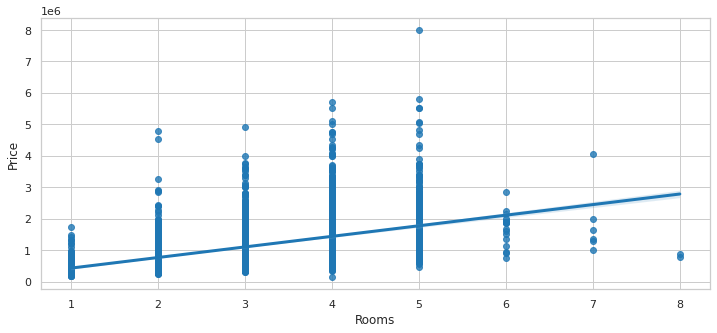

In [32]:
#Rooms vs Price
sns.regplot(data=train_set_logs, x="Rooms", y="Price")
plt.show()

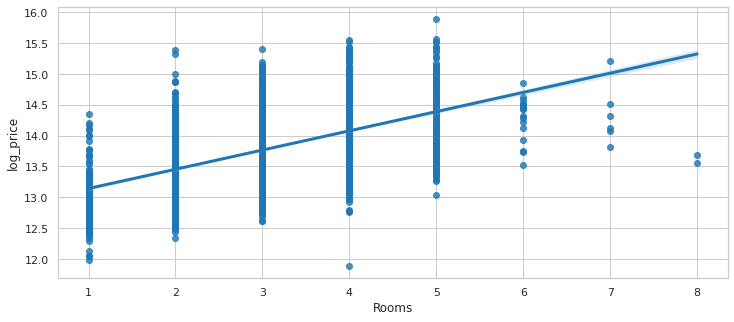

In [33]:
#Rooms vs log(Price)
sns.regplot(data=train_set_logs, x="Rooms", y="log_price")
plt.show()

For instance, we see that the Rooms feature has higher linear correlation compared with the log of the price, than the actual price. We should take that into account, and maybe later, try to see how well our data performs trying to predict the log of the price using cross validation

## Data transformation pipeline

Now we should transform our data in order to use it in our liniear regression models. We know that when using liniear models we have to mandatorily normalize or standarize our data, if not, the model will not be very accurate. In this case, to improve the  scores we use PowerTransform that: "uses the maximum likelihood-like approach of Box and Cox (1964) to select a transformation of a univariate or multivariate response for normality, linearity and/or constant variance", and performs better with this dataset

As a first approach, we will use the baseline pipeline of the previous project, but it may require some changes.

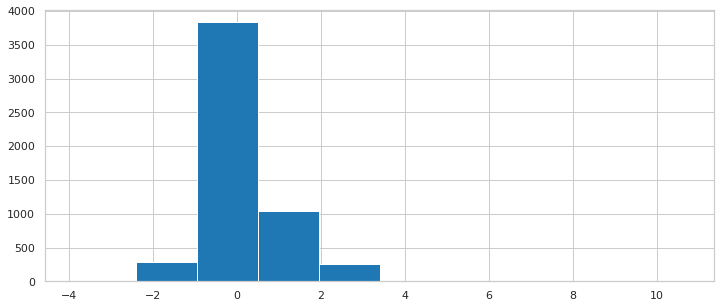

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
#gaussian scaler
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer
#imputer based on Knn model
from sklearn.impute import KNNImputer



## create a function to replace 0 by NaN
def replace_0_2_NaN(data):
    data[data == 0] = np.nan
    return data


num0_pipeline = Pipeline([
        ('knn_imputer', SimpleImputer(strategy="median")),
        ('std_scaler', PowerTransformer()),
    ])
housing_num_tr = num0_pipeline.fit_transform(train_set[['Bedroom2']])
plt.hist(housing_num_tr,bins=10)
plt.show()

In [35]:
num1_pipeline = Pipeline([
        ('zeros2NaN',FunctionTransformer(func = replace_0_2_NaN,validate=False)),
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', PowerTransformer()),
    ])

One hot encoding will generate a lot of features, and now we can only use 12.

In [36]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="constant",fill_value='Unknown')),
        ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore')),
    ])
train_set.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,NaN,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,NaN,NaN,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.0,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,NaN,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.0,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0


In [37]:
from sklearn.compose import ColumnTransformer

#We should add lots of features now, as later we will choose the 12 that better perform in our model
num_attribs0 = ['Rooms','Distance','Bedroom2','Bathroom','Car','Landsize','Lattitude','Longtitude']
num_attribs1 = ['BuildingArea','Landsize','YearBuilt']
cat_attribs = ['Type','Postcode','Regionname','Suburb','Method','SellerG','CouncilArea']

full_pipeline = ColumnTransformer([
        ("num0", num0_pipeline, num_attribs0),
        ("num1", num1_pipeline, num_attribs1),
       ("cat", cat_pipeline, cat_attribs),
    ])

housing_labels = train_set['Price'].copy()
train_set_prepared = train_set.drop("Price", axis=1) # drop labels for training set
housing_prepared = full_pipeline.fit_transform(train_set_prepared)

print(*housing_prepared[0])

  (0, 0)	1.1071230976783442
  (0, 1)	-0.32137053498262286
  (0, 2)	1.0979361828730374
  (0, 3)	0.8626788321285402
  (0, 4)	0.5007788445631765
  (0, 5)	0.7338048187139251
  (0, 6)	0.6677973273333714
  (0, 7)	-0.8558312709352839
  (0, 8)	-0.002712145279280182
  (0, 9)	0.7657547271871457
  (0, 10)	-0.01865813436501983
  (0, 11)	1.0
  (0, 44)	1.0
  (0, 207)	1.0
  (0, 210)	1.0
  (0, 505)	1.0
  (0, 622)	1.0
  (0, 730)	1.0


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2960: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [38]:
housing_prepared.shape

(5432, 742)

As we see, now our data has 742 features. Now, we are restricted and we can only use 12 of them, and later our job will be to find out which of them give us the best results. Huge part of this features are one hot encoded categorical values, that will be nearly always 0, and will not give any useful information. However, some of them, for instance if a house is placed in a Suburb near the city center, may give some information and if they perform well may be included in our model.

## REGRESSION MODELS

### Linear Regression

Linear regression is a simple technique that is useful for predicted problems.

linear regression pros:
* widely used
+ runs fast
+ easy to use (not a lot of tuning required)
+ highly interpretable
+ basis for many other methods

## Ordinary Least Squares

$$\textbf{y} = b_0+b_1 \textbf{x}$$

Ordinary Least Squares (OLS) is the simplest and most common **estimator** in which the two $b$'s are chosen to minimize the sum of squared distance between the predicted values and the actual values. 

Given the set of samples $(\textbf{x},\textbf{y})$, the objective is to minimize:

$$ ||b_0 + b_1 \textbf{x} -  \textbf{y} ||^2_2 = \sum_{j=1}^n (b_0+b_1 x_{j} -  y_j )^2,$$ with respect to $b_0, b_1$.

This expression is often called **sum of squared errors of prediction (SSE)**.

## How to compute the OLS: Scipy.optimize

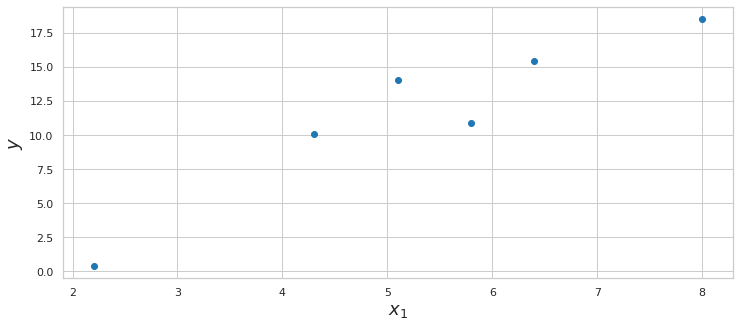

In [39]:
x = np.array([2.2, 4.3, 5.1, 5.8, 6.4, 8.0])
y = np.array([0.4, 10.1, 14.0, 10.9, 15.4, 18.5])
plt.plot(x,y,"o")
plt.xlabel("$x_1 $", fontsize=18)
plt.ylabel("$y $", rotation=90, fontsize=18)
plt.show()

In [40]:
# To understand the use of zip in the next code:
list(zip([2,3,4,5,6],[40,50,60,70,80]))

[(2, 40), (3, 50), (4, 60), (5, 70), (6, 80)]

Optimization terminated successfully.
         Current function value: 21.375000
         Iterations: 79
         Function evaluations: 153


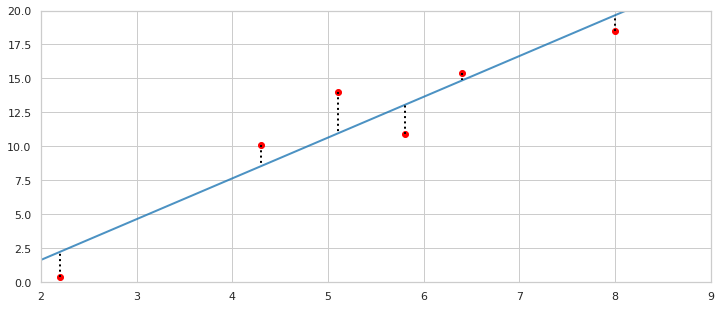

In [41]:
from scipy.optimize import fmin

# Minimize the sum of squares using a lambda function

sse = lambda b, x, y: np.sum((y - b[0] - b[1]*x) ** 2) # Store the sum of squared differences function
# Lambda function is a small anonymous function. 
# It can take any number of arguments, but can only have one expression. 
# Syntax "lambda arguments : expression"

b0,b1 = fmin(sse, [0,1], args=(x,y)); # Minimize the sum of squared differences
# [0,1] is the initial guess for w[0] and w[1] in function sse.

plt.plot(x, y, 'ro')
plt.plot([0,10], [b0, b0+b1*10], alpha=0.8) # Add the regression line, colored in blue
for xi, yi in zip(x,y):
    plt.plot([xi]*2, [yi, b0+b1*xi], "k:") # Add pointed black line to illustrate the errors
plt.xlim(2, 9); plt.ylim(0, 20) # Restrict the domain
plt.show()

We can minimize other criteria, such as the **sum of absolute differences between the predicted values and the actual values**. 

Optimization terminated successfully.
         Current function value: 10.162463
         Iterations: 39
         Function evaluations: 77


(0.0, 20.0)

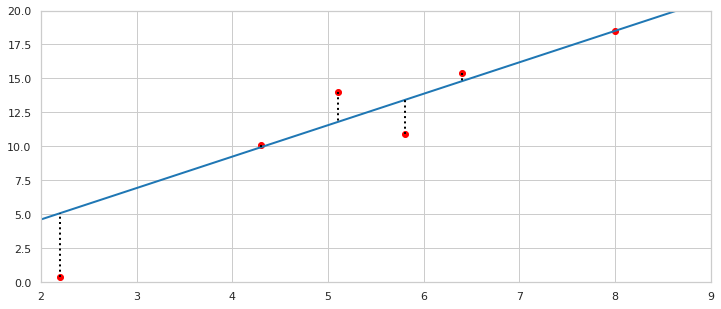

In [42]:
sabs = lambda b, x, y: np.sum(np.abs(y - b[0] - b[1]*x)) # Lambda function 

b0,b1 = fmin(sabs, [0,1], args=(x,y)) # Minimize the sum of absolute differences
plt.plot(x, y, 'ro')
plt.plot([0,10], [b0, b0+b1*10]) # Add the regression line, colored in blue
for xi, yi in zip(x,y):
    plt.plot([xi]*2, [yi, b0+b1*xi], "k:") # Add pointed black line to illustrate the errors
plt.xlim(2, 9); plt.ylim(0, 20) # Restrict the domain

## OLS with multiple linear regression

## Multiple Linear Regression
Simple linear regression can easily be extended to include multiple features. This is called multiple linear regression:

$$ Y = \beta_0 + \beta_1X_1 + ... \beta_pX_p + \epsilon $$



In [43]:
#We create a df of our data for visualization purposes
housing_prepared_df = pd.DataFrame(housing_prepared[:,:8].toarray())
housing_prepared_df = housing_prepared_df.set_axis(['Rooms','Distance','Bedroom2','Bathroom','Car','Landsize','Lattitude','Longtitude'], axis=1, inplace=False)
housing_prepared_df

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude
0,1.107123,-0.321371,1.097936,0.862679,0.500779,0.733805,0.667797,-0.855831
1,-0.983208,-0.810915,-0.933014,-0.805669,-0.598026,-0.360128,0.407193,-0.054138
2,0.109739,0.024665,0.145501,-0.805669,2.065950,0.513341,0.162877,0.686160
3,0.109739,-0.894796,0.145501,-0.805669,-0.598026,0.004245,0.553783,-0.369895
4,1.107123,0.766278,1.097936,1.737382,0.500779,0.684846,0.521208,1.011890
...,...,...,...,...,...,...,...,...
5427,0.109739,0.375373,0.145501,-0.805669,-0.598026,-1.944958,1.107566,-0.025869
5428,-0.983208,-1.408977,-0.933014,-0.805669,-0.598026,-0.445977,0.390906,-0.135518
5429,0.109739,-1.811647,0.145501,-0.805669,-0.598026,0.130789,-0.211741,-0.005113
5430,-0.983208,0.780143,-0.933014,0.862679,-0.598026,-0.321640,-1.498472,0.648114


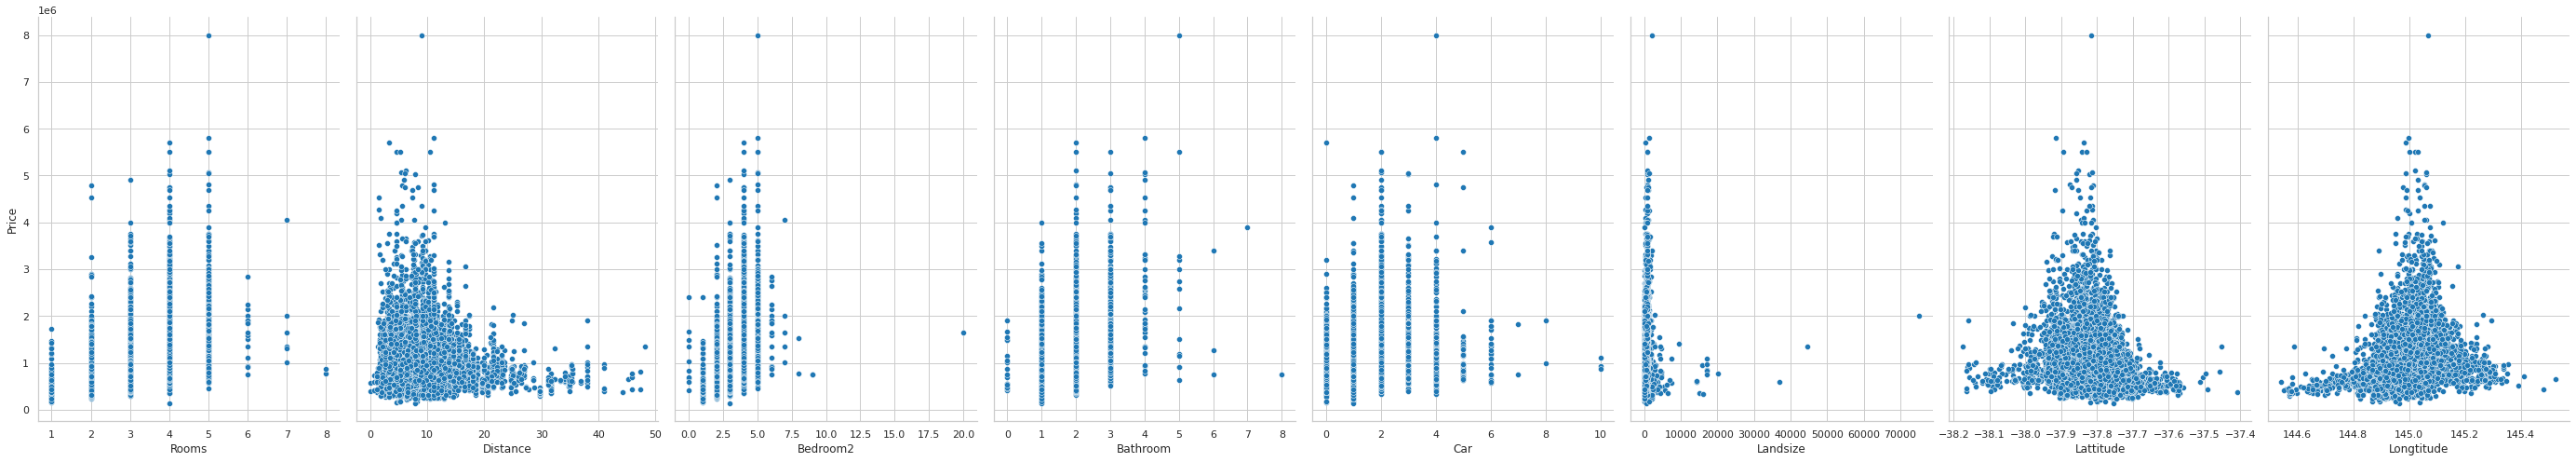

In [44]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(train_set, x_vars=['Rooms','Distance','Bedroom2','Bathroom','Car','Landsize','Lattitude','Longtitude'],y_vars='Price', height=7, aspect=0.7)
plt.show()

Now we use the first 12 features, later we should adjust the model and see which features are better.

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
housing_prepared_reduced = housing_prepared[:,:12]
features = ['Rooms','Distance','Bedroom2','Bathroom','Car','Landsize','Lattitude','Longtitude','BuildingArea','Landsize','YearBuilt','h']
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared_reduced, housing_labels)

LinearRegression()

Coeff and intercept: [ 1.83043765e+05 -2.77464221e+05  4.71640485e+01  1.27202685e+05
  5.05523832e+04  6.94899643e+04 -1.27028582e+05  9.81463156e+04
  7.88495456e+04 -3.96434309e+03 -8.41289746e+04  2.56703548e+05] 899619.681518154


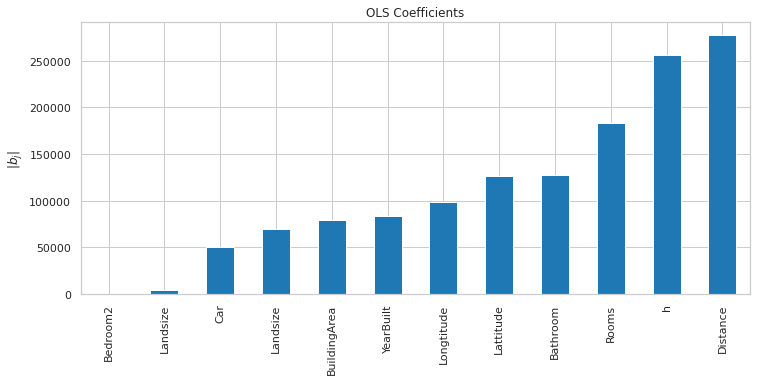

In [46]:
print('Coeff and intercept: {} {}'.format(lin_reg.coef_,  lin_reg.intercept_))
coef = pd.Series(np.abs(lin_reg.coef_),features).sort_values()
coef.plot(kind='bar', title='OLS Coefficients',ylabel="|$b_j$|")
plt.show()

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

housing_predictions = lin_reg.predict(housing_prepared_reduced)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

lin_mae = mean_absolute_error(housing_labels, housing_predictions)

print('Linear regression RMSE: ',lin_rmse)
print('Linear regression MAE: ',lin_mae)

Linear regression RMSE:  435923.6518615943
Linear regression MAE:  291216.48869694676


## Regularized Models

### Ridge Regression.
Ridge Regression penalizes the coefficients if they are too far from zero, thus enforcing them to be small in a continuous way. This way, it decreases model complexity while keeping all variables in the model.

For that, Ridge regression adds a **$\ell_2$-norm** regularization term to the sum of squared errors of prediction (SSE). Given the set of samples  (𝑋,𝐲) , the objetive is to minimize:

$$ minimize(\sum_{i=0}^n (y_i - B_0- \sum_{j=1}^pB_jx_{ij})^2 + \lambda\sum_{j=1}^pB_j^2) $$

### Lasso Regression:

Often, in real problems, there are uninformative variables in the data which prevent proper modeling of the problem and thus, the building of a correct regression model. In such cases, a feature selection process is crucial to select only the informative features and discard non-informative ones. This can be achieved by sparse methods which use a penalization approach, such as **Lasso** (least absolute shrinkage and selection operator) to set some model coefficients to zero (thereby discarding those variables). Sparsity can be seen as an application of Occam’s razor: prefer simpler models to complex ones.
For that, Lasso regression adds a **$\ell_1$-norm** regularization term to the sum of squared errors of prediction (SSE).  Given the set of samples  (𝑋,𝐲) , the objetive is to minimize:

$$ minimize(\sum_{i=0}^n (y_i - B_0- \sum_{j=1}^pB_jx_{ij})^2 + \lambda\sum_{j=1}^p|B_j|)$$

#### Geometric explanantion:
The left panel shows L1 regularization (lasso regularization) and the right panel L2 regularization (Ridge regression). The ellipses indicate the distribution for no regularization. The blue lines show the constraints due to regularization (limiting  𝜃2  for ridge regression and  |𝜃|  for Lasso regression). The corners of the L1 regularization create more opportunities for the solution to have zeros for some of the weights.

![alt text](https://miro.medium.com/max/1400/1*Jd03Hyt2bpEv1r7UijLlpg.png "Regularization")




Coeff and intercept: [ 1.83047225e+05 -2.77495920e+05  2.49028646e+02  1.27001924e+05
  5.05954798e+04  6.93634920e+04 -1.27050123e+05  9.81324332e+04
  7.88678782e+04 -3.88544918e+03 -8.40923755e+04  2.56595495e+05] 899694.4177484195


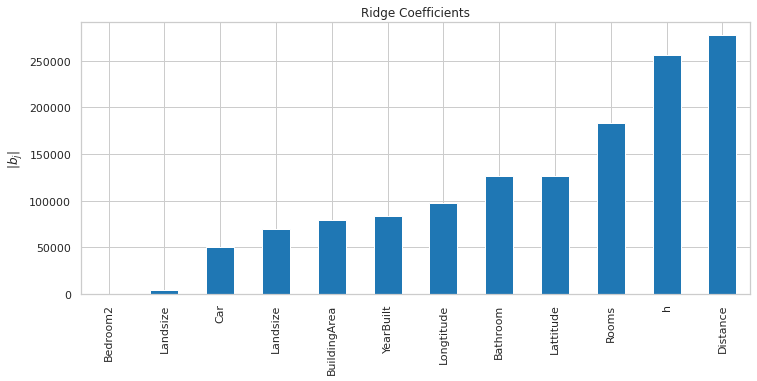

In [48]:
housing_prepared_reduced = housing_prepared[:,:12]
features = ['Rooms','Distance','Bedroom2','Bathroom','Car','Landsize','Lattitude','Longtitude','BuildingArea','Landsize','YearBuilt','h']
## Ridge Regression
regr_ridge = linear_model.Ridge(alpha=.3) # Create a Ridge regressor
regr_ridge.fit(housing_prepared_reduced, housing_labels)  # Perform the fitting

print('Coeff and intercept: {} {}'.format(regr_ridge.coef_,  regr_ridge.intercept_))
coef = pd.Series(np.abs(regr_ridge.coef_),features).sort_values()
coef.plot(kind='bar', title='Ridge Coefficients',ylabel="|$b_j$|")
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

housing_predictions = regr_ridge.predict(housing_prepared_reduced)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

lin_mae = mean_absolute_error(housing_labels, housing_predictions)

print('Ridge regression RMSE: ',lin_rmse)
print('Ridge regression MAE: ',lin_mae)

Ridge regression RMSE:  435923.69947551185
Ridge regression MAE:  291213.9773205323


Coeff and intercept: [ 1.83043887e+05 -2.77463529e+05  4.72189084e+01  1.27202550e+05
  5.05520105e+04  6.94895199e+04 -1.27028264e+05  9.81459666e+04
  7.88494441e+04 -3.96374417e+03 -8.41289880e+04  2.56702115e+05] 899620.6767854844


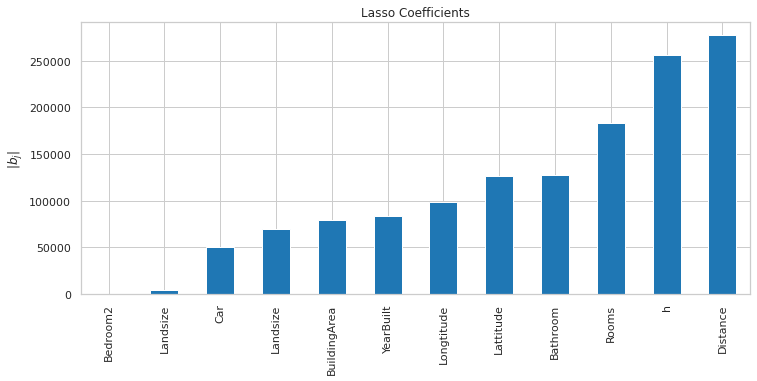

In [50]:
## Lasso Regression
regr_lasso = linear_model.Lasso(alpha=.3,tol=0.001,max_iter = 10000) # Create a Lasso regressor
regr_lasso.fit(housing_prepared_reduced, housing_labels)  # Perform the fitting

print('Coeff and intercept: {} {}'.format(regr_lasso.coef_,  regr_lasso.intercept_))

coef = pd.Series(np.abs(regr_lasso.coef_),features).sort_values()
coef.plot(kind='bar', title='Lasso Coefficients',ylabel="|$b_j$|")
plt.show()

In [51]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

housing_predictions = regr_lasso.predict(housing_prepared_reduced)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

lin_mae = mean_absolute_error(housing_labels, housing_predictions)

print('Ridge regression RMSE: ',lin_rmse)
print('Ridge regression MAE: ',lin_mae)

Ridge regression RMSE:  435923.65186305
Ridge regression MAE:  291216.40667107655


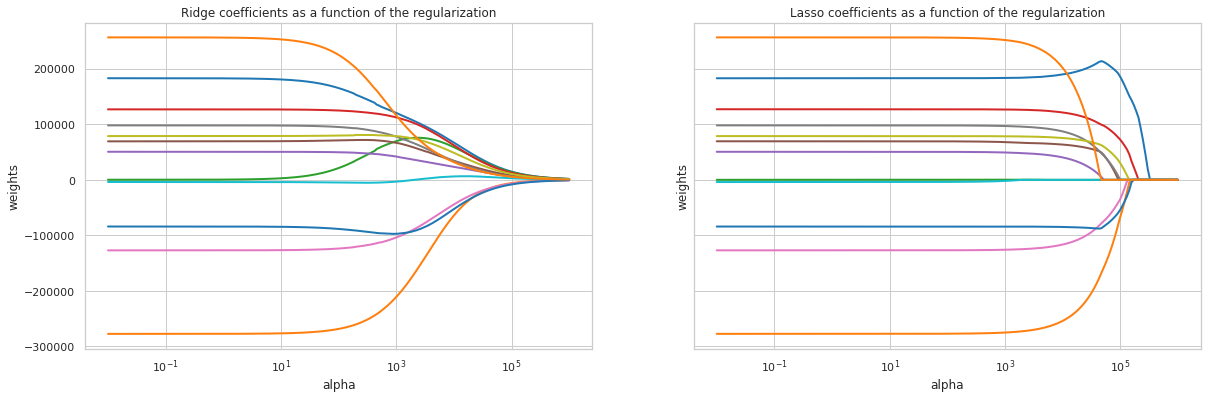

In [52]:
n_alphas = 200
alphas = np.logspace(-2, 6, n_alphas)

coefs_ridge = []

for l in alphas:
    regr_ridge = linear_model.Ridge(alpha=l) # Create a Ridge regressor
    regr_ridge.fit(housing_prepared_reduced, housing_labels)  # Perform the fitting
    coefs_ridge.append(regr_ridge.coef_)

coefs_lasso = []
for l in alphas:
    regr_lasso = linear_model.Lasso(alpha=l,max_iter = 10000,tol=0.001) # Create a Ridge regressor
    regr_lasso.fit(housing_prepared_reduced, housing_labels)  # Perform the fitting
    coefs_lasso.append(regr_lasso.coef_)
# #############################################################################
# Display results

fig, axs = plt.subplots(1, 2, figsize=(20, 6), sharey=True)


axs[0].plot(alphas, coefs_ridge)
axs[0].set_xscale('log')
axs[0].set_title('Ridge coefficients as a function of the regularization')
axs[0].axis('tight')
axs[0].set_xlabel('alpha')
axs[0].set_ylabel('weights')

axs[1].plot(alphas, coefs_lasso)
axs[1].set_xscale('log')
axs[1].set_title('Lasso coefficients as a function of the regularization')
axs[1].axis('tight')
axs[1].set_xlabel('alpha')
axs[1].set_ylabel('weights')
plt.show()


## Select and train a model

Now we have to select our model and the best 12 features that gives us the best cross validation score.

In [53]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [54]:
def cross_val_evaluation(model,X_train,y_train,model_name):
    scores = -cross_val_score(model, X_train, y_train,cv=5,scoring="neg_root_mean_squared_error")
    print("\n ",model_name)
    display_scores(scores)

lin_reg = LinearRegression()
cross_val_evaluation(lin_reg,housing_prepared_reduced,housing_labels,'Linear Regression')

ridge_reg = linear_model.Ridge(alpha=.3) # Create a Ridge regressor
cross_val_evaluation(ridge_reg,housing_prepared_reduced,housing_labels,'Ridge Regression')

lasso_reg = linear_model.Lasso(alpha=0.01,max_iter = 5000) # Create a Lasso regressor
cross_val_evaluation(lasso_reg,housing_prepared_reduced,housing_labels,'Lasso Regression')

#forest_reg = RandomForestRegressor(random_state=42)
#cross_val_evaluation(forest_reg,housing_prepared_reduced,housing_labels,'Random Forest')


  Linear Regression
Scores: [464428.68487519 428197.05493658 405959.90934487 464133.10761533
 420514.43002589]
Mean: 436646.6373595738
Standard deviation: 23667.13774037428

  Ridge Regression
Scores: [464482.26341302 428159.70996888 405958.56949331 464135.81732611
 420511.81469306]
Mean: 436649.6349788755
Standard deviation: 23683.72857668627

  Lasso Regression
Scores: [464428.68686009 428197.05127154 405959.90734344 464133.10842912
 420514.42991142]
Mean: 436646.6367631212
Standard deviation: 23667.13919171026


Defining cross-validation scoring system when we try to predict the log of the price

In [55]:
from sklearn.metrics import  make_scorer
def my_custom_loss_func(y_true, y_pred):
    diff = np.sqrt(mean_squared_error(np.exp(y_true), np.exp(y_pred)))
    return diff
#This scorer will allow us to compare the RSME of the models predicting the actual price, with the ones trying to predict the log of the price
log_scorer = make_scorer(my_custom_loss_func, greater_is_better=False)
scores = -cross_val_score(lasso_reg, housing_prepared_reduced,np.log(housing_labels),cv=5,scoring=log_scorer)
print('LASSO alpha = 0.01 with log(price) scoring: ')
print('--------------------------------------------')
display_scores(scores)

LASSO alpha = 0.01 with log(price) scoring: 
--------------------------------------------
Scores: [460011.67045886 417047.30939285 393773.81178752 457044.03034411
 413930.89487122]
Mean: 428361.5433709125
Standard deviation: 25911.31909558914


We see that the mean RSME is lower when trying to predict the log of the price for the same model. That is a very strong evidence that this method could give us better scores than trying to predict the actual price. 

### Feature selection

First we will select from the housing_prepared 12 features, an evaluate this features using OLS regression

### FORWARD SELECTION

With forward selection we will first start with a null model, that only contains an intercept. Next we will add a feature, and that will be the one that minimizes the RMSE. We will keep on adding features until we do not have any feature that gives a better RMSE or when we already have the 12 features allowed.

In [56]:
baseline_intercept = housing_labels.mean()
print("Null regression model intercept: ",baseline_intercept)

Null regression model intercept:  1078469.5362665686


We can use mlxtend feature_selection functionalities to use forward and backwards selection.


!pip install mlxtend

In [57]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=12, forward=True, verbose=2, scoring="neg_root_mean_squared_error",cv = 5,n_jobs=4)
sfs1 = sfs1.fit(housing_prepared, housing_labels)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  38 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 742 out of 742 | elapsed:    6.9s finished

[2021-10-26 16:29:23] Features: 1/12 -- score: -562039.5554395894[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 741 out of 741 | elapsed:    5.5s finished

[2021-10-26 16:29:29] Features: 2/12 -- score: -505704.01506595156[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 740 out of 740 | elapsed:    5.9s finished

[2021-10-26 16:29:35] Features: 3/12 -- score: -471434.19625022274[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 739 out of 739 | el

Now we see the indexes of the features that entered our forward selection

In [58]:
feat_index = list(sfs1.k_feature_idx_)
print(feat_index)

[0, 1, 3, 5, 7, 8, 10, 11, 12, 158, 206, 605]


In [59]:
housing_prepared_selected = housing_prepared[:,feat_index]
print(housing_prepared_selected[0])

  (0, 0)	1.1071230976783442
  (0, 1)	-0.32137053498262286
  (0, 2)	0.8626788321285402
  (0, 3)	0.7338048187139251
  (0, 4)	-0.8558312709352839
  (0, 5)	-0.002712145279280182
  (0, 6)	-0.01865813436501983
  (0, 7)	1.0


### BACKWARDS SELECTION
With backwards selection, we start with a linear model that has all 742 features. Each iteration, we evaluate with cross validation the models resulting of removing each of the remaining features. Then, we definitively remove the feature that, when removed, it maximized the RMSE. We should repeat this until we only have 12 remaining features. It is obvious that this procedure will be very slow, as each iteration we have to do a lot of cross-validations. Forward selection is way faster, but with backwards selection we may achieve better results.

In [60]:
'''
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=12, forward=False, verbose=2, scoring='neg_root_mean_squared_error',cv = 5,n_jobs=4)
sfs1 = sfs1.fit(housing_prepared, housing_labels)
'''


"\nfrom mlxtend.feature_selection import SequentialFeatureSelector as sfs\nlreg = LinearRegression()\nsfs1 = sfs(lreg, k_features=12, forward=False, verbose=2, scoring='neg_root_mean_squared_error',cv = 5,n_jobs=4)\nsfs1 = sfs1.fit(housing_prepared, housing_labels)\n"

We will not use backwards selection for this problem, as the number of selected features is very low (12) compared to the number of initial features. Also, to compute the 12 features we have to wait about 14 hours.

### Parameters selection
Now, it is time to use gridSearch to find the better alphas for our model, evaluating it with cross correlation. For now, we cannot see huge differences between Lasso and Ridge regressors, that is why we will perform gridsearch in both to see which performs better and finds a better alpha with the lowest RMSE.

In [61]:
from sklearn.model_selection import GridSearchCV

#the set of parameters to try
param_grid = [{'alpha': np.logspace(-2, 5, 1000)}]

ridge_reg = linear_model.Ridge() # Create a Ridge regressor
grid_search_ridge = GridSearchCV(ridge_reg, param_grid, cv=5,scoring="neg_root_mean_squared_error",
                                 return_train_score=True)

grid_search_ridge.fit(housing_prepared_selected, housing_labels)
print("The best model was found with = ",grid_search_ridge.best_params_)
print(grid_search_ridge.best_score_)
pd.DataFrame(grid_search_ridge.cv_results_)

The best model was found with =  {'alpha': 0.7427982482564914}
-398248.6258535177


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006324,0.000548,0.000571,6.301489e-05,0.01,{'alpha': 0.01},-432980.002657,-385267.184538,-372326.557733,-416075.682992,-384599.745323,-398249.834648,22586.880562,311,-388407.684543,-400495.001513,-403602.371543,-392752.181013,-400793.745137,-397210.196750,5689.460175
1,0.005957,0.000076,0.000552,2.144782e-05,0.010163,{'alpha': 0.010162650893929946},-432980.005141,-385267.173931,-372326.538273,-416075.692539,-384599.756946,-398249.833366,22586.887114,310,-388407.684550,-400495.001521,-403602.371551,-392752.181020,-400793.745144,-397210.196757,5689.460176
2,0.006093,0.000174,0.000571,5.403072e-05,0.010328,{'alpha': 0.010327947319189514},-432980.007483,-385267.163027,-372326.522363,-416075.704489,-384599.768624,-398249.833197,22586.893215,309,-388407.684558,-400495.001530,-403602.371560,-392752.181026,-400793.745151,-397210.196765,5689.460176
3,0.006000,0.000124,0.000518,1.496038e-05,0.010496,{'alpha': 0.010495932305582278},-432980.009724,-385267.152043,-372326.504373,-416075.715238,-384599.780735,-398249.832423,22586.899529,308,-388407.684566,-400495.001538,-403602.371569,-392752.181034,-400793.745159,-397210.196773,5689.460176
4,0.006103,0.000150,0.000511,2.017681e-05,0.010667,{'alpha': 0.010666649582795394},-432980.012220,-385267.140785,-372326.486021,-416075.726945,-384599.792863,-398249.831767,22586.906185,307,-388407.684574,-400495.001548,-403602.371578,-392752.181041,-400793.745166,-397210.196781,5689.460177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.003243,0.000024,0.000442,1.317797e-05,93750.150151,{'alpha': 93750.1501514529},-661833.385305,-616522.050786,-591733.902046,-645969.490431,-608941.967181,-625000.159150,25427.493450,996,-616436.044895,-627657.689832,-633276.123823,-620051.326000,-629281.864166,-625340.609743,6182.920474
996,0.003258,0.000021,0.000448,2.087687e-05,95275.004724,{'alpha': 95275.00472427299},-662146.172216,-616841.040325,-592051.100289,-646267.701068,-609256.115203,-625312.425820,25423.350264,997,-616741.483840,-627967.778029,-633591.597796,-620368.139914,-629596.015757,-625653.003067,6185.010460
997,0.003291,0.000028,0.000453,9.378067e-06,96824.661193,{'alpha': 96824.66119303113},-662454.891182,-617155.901507,-592364.210925,-646562.057158,-609566.211741,-625620.654502,25419.250784,998,-617042.969238,-628273.849217,-633902.990451,-620680.871342,-629906.099368,-625961.355923,6187.072386
998,0.003331,0.000031,0.000459,1.203237e-05,98399.522963,{'alpha': 98399.52296278227},-662759.582018,-617466.674075,-592673.272788,-646852.595731,-609872.295366,-625924.883995,25415.194910,999,-617340.539222,-628575.942197,-634210.341023,-620989.559121,-630212.154250,-626265.707163,6189.106537


In [62]:
#the set of parameters to try
param_grid = [{'alpha': np.logspace(-2, 5, 1000)}]

lasso_reg = linear_model.Lasso(max_iter = 2000,tol=0.1) # Create a LASSO regressor
grid_search_lasso = GridSearchCV(lasso_reg, param_grid, cv=5,scoring="neg_root_mean_squared_error",
                                 return_train_score=True)

grid_search_lasso.fit(housing_prepared_selected, housing_labels)
print("The best model was found with = ",grid_search_lasso.best_params_)
print(grid_search_lasso.best_score_)
pd.DataFrame(grid_search_lasso.cv_results_)

The best model was found with =  {'alpha': 0.45045732517594583}
-398252.47072647745


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011580,0.000253,0.000663,0.000026,0.01,{'alpha': 0.01},-432975.116288,-385303.992159,-372331.450582,-416050.341211,-384601.501218,-398252.480292,22575.817414,84,-388407.453958,-400493.842979,-403602.250211,-392748.774383,-400793.720875,-397209.208481,5689.901414
1,0.011477,0.000273,0.000718,0.000031,0.010163,{'alpha': 0.010162650893929946},-432975.121116,-385303.992078,-372331.450484,-416050.341305,-384601.501270,-398252.481251,22575.818940,134,-388407.453958,-400493.842979,-403602.250211,-392748.774383,-400793.720875,-397209.208481,5689.901414
2,0.011495,0.000206,0.000658,0.000060,0.010328,{'alpha': 0.010327947319189514},-432975.121164,-385303.991995,-372331.449201,-416050.341400,-384601.501323,-398252.481017,22575.819267,101,-388407.453958,-400493.842979,-403602.250211,-392748.774383,-400793.720875,-397209.208481,5689.901414
3,0.010929,0.000378,0.000599,0.000040,0.010496,{'alpha': 0.010495932305582278},-432975.121213,-385303.991911,-372331.449100,-416050.341497,-384601.501377,-398252.481020,22575.819324,102,-388407.453958,-400493.842979,-403602.250211,-392748.774383,-400793.720875,-397209.208481,5689.901414
4,0.010944,0.000319,0.000654,0.000044,0.010667,{'alpha': 0.010666649582795394},-432975.121263,-385303.991826,-372331.448997,-416050.341596,-384601.501432,-398252.481023,22575.819382,103,-388407.453958,-400493.842979,-403602.250211,-392748.774383,-400793.720875,-397209.208481,5689.901414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.003151,0.000208,0.000475,0.000050,93750.150151,{'alpha': 93750.1501514529},-554266.447949,-498884.506180,-476631.092198,-539785.276314,-495220.350359,-512957.534600,29183.633423,996,-505345.151977,-515806.280346,-517790.762760,-507028.206132,-515811.564041,-512356.393051,5117.018278
996,0.003112,0.000150,0.000437,0.000025,95275.004724,{'alpha': 95275.00472427299},-556663.302771,-501250.339117,-478868.500947,-542069.577171,-497518.484713,-515274.040944,29217.662770,997,-507716.205142,-518109.228369,-520068.119357,-509361.200691,-518104.140045,-514671.778721,5085.270876
997,0.003053,0.000134,0.000429,0.000024,96824.661193,{'alpha': 96824.66119303113},-559125.596677,-503684.336268,-481171.682922,-544417.365134,-499886.535502,-517657.103301,29250.520525,998,-510154.080763,-520476.687198,-522409.882070,-511759.639612,-520461.593764,-517052.376681,5052.743411
998,0.003115,0.000124,0.000458,0.000048,98399.522963,{'alpha': 98399.52296278227},-561654.902198,-506186.773622,-483542.237795,-546830.186040,-502326.044703,-520108.028872,29282.328298,999,-512660.375983,-522910.647645,-524817.617499,-514225.091686,-522885.317729,-519499.810108,5019.463389


##### Models with log(Price)

As wee had seen before, we have some evidence that trying to predict the log of the price may give better scores. That is why we will also test Ridge and Lasso using this method, and after that we will choose the model that gives us the better score.

In [63]:
log_housing_labels = np.log(housing_labels) #We will fit the models with the log of the housing_labels

In [64]:
#the set of parameters to try
param_grid = [{'alpha': np.logspace(-2, 5, 1000)}]

ridge_reg = linear_model.Ridge() # Create a Ridge regressor
grid_search_ridge = GridSearchCV(ridge_reg, param_grid, cv=5,scoring=log_scorer, #Using log scorer
                                 return_train_score=True)

grid_search_ridge.fit(housing_prepared_selected,log_housing_labels) #Predict the log
print("The best model was found with = ",grid_search_ridge.best_params_)
print(grid_search_ridge.best_score_)
pd.DataFrame(grid_search_ridge.cv_results_)

The best model was found with =  {'alpha': 0.01}
-372964.87595969083


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006112,0.000150,0.000759,0.000029,0.01,{'alpha': 0.01},-410151.182283,-356451.514235,-353062.241019,-392750.902897,-352408.539366,-372964.875960,23940.247314,1,-362992.963515,-375262.238398,-377156.690322,-368026.958171,-376244.422196,-371936.654520,5516.166759
1,0.005986,0.000083,0.000801,0.000045,0.010163,{'alpha': 0.010162650893929946},-410151.194534,-356451.522058,-353062.199510,-392750.937870,-352408.639749,-372964.898744,23940.245484,3,-362992.974989,-375262.244955,-377156.705291,-368026.961748,-376244.476929,-371936.672782,5516.174704
2,0.006365,0.000839,0.000760,0.000026,0.010328,{'alpha': 0.010327947319189514},-410151.201516,-356451.529331,-353062.157675,-392750.977675,-352408.574036,-372964.888047,23940.271470,2,-362992.984169,-375262.248751,-377156.719512,-368026.968377,-376244.430188,-371936.670199,5516.166636
3,0.005954,0.000114,0.000750,0.000028,0.010496,{'alpha': 0.010495932305582278},-410151.209815,-356451.536833,-353062.115557,-392751.011270,-352408.692596,-372964.913214,23940.265209,5,-362992.994044,-375262.253076,-377156.732837,-368026.970298,-376244.495797,-371936.689210,5516.176452
4,0.005887,0.000104,0.000736,0.000030,0.010667,{'alpha': 0.010666649582795394},-410151.222981,-356451.545265,-353062.072998,-392751.048239,-352408.645971,-372964.907091,23940.289330,4,-362993.006228,-375262.260887,-377156.745684,-368026.974236,-376244.460485,-371936.689504,5516.169801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.003421,0.000080,0.000711,0.000022,93750.150151,{'alpha': 93750.1501514529},-682284.378009,-640794.359909,-604436.705661,-667552.932678,-628668.045413,-644747.284334,27670.349787,996,-635909.068582,-647666.707809,-653346.692589,-639878.891848,-649196.708374,-645199.613840,6372.794100
996,0.003383,0.000093,0.000699,0.000059,95275.004724,{'alpha': 95275.00472427299},-682550.186736,-641061.378207,-604703.529340,-667806.737453,-628928.235134,-645010.013374,27668.694263,997,-636167.458450,-647926.583693,-653611.478505,-640146.306081,-649460.277965,-645462.420939,6373.688146
997,0.003409,0.000135,0.000686,0.000013,96824.661193,{'alpha': 96824.66119303113},-682812.419814,-641324.815415,-604966.817371,-668057.141004,-629184.964457,-645269.231612,27667.043418,998,-636422.396556,-648182.977880,-653872.722697,-640410.157968,-649720.320317,-645721.715084,6374.567398
998,0.003418,0.000029,0.000729,0.000015,98399.522963,{'alpha': 98399.52296278227},-683071.116125,-641584.710129,-605226.606450,-668304.179904,-629438.269860,-645524.976493,27665.397762,999,-636673.919686,-648435.927767,-654130.463046,-640670.485219,-649976.873194,-645977.533783,6375.432095


In [65]:
#the set of parameters to try
param_grid = [{'alpha': np.logspace(-4, 2, 1000)}]

lasso_reg = linear_model.Lasso(max_iter = 5000,tol=0.001) # Create a LASSO regressor
grid_search_lasso = GridSearchCV(lasso_reg, param_grid, cv=5,scoring=log_scorer,#Using log scorer
                                 return_train_score=True)

grid_search_lasso.fit(housing_prepared_selected, log_housing_labels) #Predict the log
print("The best model was found with = ",grid_search_lasso.best_params_)
print(grid_search_lasso.best_score_)
pd.DataFrame(grid_search_lasso.cv_results_)

The best model was found with =  {'alpha': 0.0001}
-373046.7832579124


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007305,0.000117,0.000893,0.000024,0.0001,{'alpha': 0.0001},-410255.436892,-356506.124818,-352919.544287,-392971.061703,-352581.748591,-373046.783258,23995.739417,1,-363072.625207,-375349.284276,-377296.016909,-368113.321758,-376353.384105,-372036.926451,5531.996458
1,0.007288,0.000147,0.000891,0.000037,0.000101,{'alpha': 0.00010139254075588153},-410257.302796,-356507.206843,-352917.397446,-392974.688835,-352584.283634,-373048.175911,23996.699053,2,-363074.055367,-375350.477739,-377297.658930,-368114.317965,-376354.986158,-372038.299232,5532.096781
2,0.007214,0.000156,0.000873,0.000016,0.000103,{'alpha': 0.00010280447320933097},-410259.196695,-356508.306010,-352915.223048,-392978.367555,-352586.857142,-373049.590090,23997.671762,3,-363075.507434,-375351.690049,-377299.325871,-368115.330114,-376356.612559,-372039.693205,5532.198547
3,0.007131,0.000137,0.000886,0.000025,0.000104,{'alpha': 0.00010423606739764012},-410261.119033,-356509.422614,-352913.020774,-392982.098609,-352590.605348,-373051.253276,23998.464071,4,-363076.981768,-375352.921530,-377301.018134,-368116.358483,-376357.861967,-372041.028376,5532.239079
4,0.007093,0.000100,0.000904,0.000050,0.000106,{'alpha': 0.0001056875971184804},-410263.070264,-356510.556957,-352910.790303,-392985.282314,-352593.257621,-373052.591492,23999.363733,5,-363078.478737,-375354.172512,-377302.736132,-368117.325242,-376359.538269,-372042.450178,5532.354878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.002465,0.000023,0.000688,0.000011,94.618482,{'alpha': 94.61848194721992},-700377.658681,-658993.945301,-622715.291157,-684857.739885,-646472.198090,-662683.366623,27518.805769,582,-653551.494801,-665386.791780,-671415.380692,-658162.921779,-667177.500351,-663138.817881,6427.163302
996,0.002494,0.000040,0.000705,0.000009,95.936083,{'alpha': 95.93608287093147},-700377.658681,-658993.945301,-622715.291157,-684857.739885,-646472.198090,-662683.366623,27518.805769,582,-653551.494801,-665386.791780,-671415.380692,-658162.921779,-667177.500351,-663138.817881,6427.163302
997,0.002476,0.000006,0.000686,0.000009,97.272032,{'alpha': 97.27203192450537},-700377.658681,-658993.945301,-622715.291157,-684857.739885,-646472.198090,-662683.366623,27518.805769,582,-653551.494801,-665386.791780,-671415.380692,-658162.921779,-667177.500351,-663138.817881,6427.163302
998,0.002491,0.000038,0.000698,0.000011,98.626585,{'alpha': 98.6265846131283},-700377.658681,-658993.945301,-622715.291157,-684857.739885,-646472.198090,-662683.366623,27518.805769,582,-653551.494801,-665386.791780,-671415.380692,-658162.921779,-667177.500351,-663138.817881,6427.163302


As the grid search shows us, the best model is Ridge with 'alpha'= 0.01, and using the log method.

## Evaluate the model

In this case, we have used all the data available in the train set to train our models, and we have used cross validation to test their permormance. We have not split the training set into train and test, because we already have a test set, the kaggle one. So now, using all the info obtained with our validation methods, and after tuning the model, we can generate the kaggle submission and see how it performs in the test set.

##### Kaggle submission

In [66]:
#Grid search above takes a lot to run sometimes, when tring a lot of paramaters, that is why I put them manually
final_model = linear_model.Ridge(alpha = 0.01)
final_model.fit(housing_prepared_selected, log_housing_labels)#now try to predict log(price)
X_test_prepared = full_pipeline.transform(test_set)
#VERY IMPORTANT: SELECT THE SAME FEATURES THAT WE GOT WITH FORWARD SELECTION
y_pred = final_model.predict(X_test_prepared[:,feat_index])

#EXTREMELY IMPORTANT: y_pred are the log(price) predictions, if we want the actual prices prediction we have to use np.exp
y_pred = np.exp(y_pred)

df_output = pd.DataFrame(y_pred)
df_output = df_output.reset_index()
df_output.columns = ['index','Price']

df_output.to_csv('kaggle372390.csv',index=False)

In [67]:
scores = cross_val_score(final_model, housing_prepared_selected, log_housing_labels, scoring=log_scorer, cv=10)
print("Expected Kaggle score with cross validation:", -scores.mean())
print("Standard deviation:", scores.std())
confidence = 2*(scores.std())
print("95% confidence interval: [",-scores.mean()-confidence,',',-scores.mean()+confidence,"]")

Expected Kaggle score with cross validation: 372390.12066184456
Standard deviation: 31541.020733326754
95% confidence interval: [ 309308.07919519104 , 435472.1621284981 ]


# LAST SUBMISSION: 372390.12066184456